In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [26]:
def createGroupedCharts(labels, ax, dataset, disaggregationColumn, countColumn="Count", width=0.2):
    ind = np.arange(len(labels))
    axesList = []
    
    uniqueDisaggValues = list(dataset[disaggregationColumn].unique())
    for value in uniqueDisaggValues:
        label = disaggregationColumn + " {}".format(value)
        count = list(dataset.loc[dataset[disaggregationColumn]==value][countColumn])
        axesList.append(ax.bar(ind - width*((len(uniqueDisaggValues)-3-((value-1)*2)/2)), count, width, label=label))
        
    return axesList

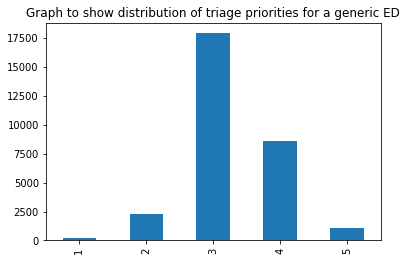

In [9]:
Dataset_ED = pd.read_excel("C:\\Users\\jnguyen11\\OneDrive - KPMG\\Desktop\\Stuff\\Generic ED 2009.xlsx", sheet_name="Generic ED Data")

Dataset_ED["Triage Priority"].value_counts().sort_index().plot(kind="bar", x = "Triage Priority", y="Presentation count", title="Graph to show distribution of triage priorities for a generic ED")

Dataset_ED["Arrival Hour"] = [d.hour for d in Dataset_ED["Arrival Date"]]

Hour_Triage = Dataset_ED.groupby(["Arrival Hour", "Triage Priority"]).size().reset_index().rename(columns={0:'Count'})

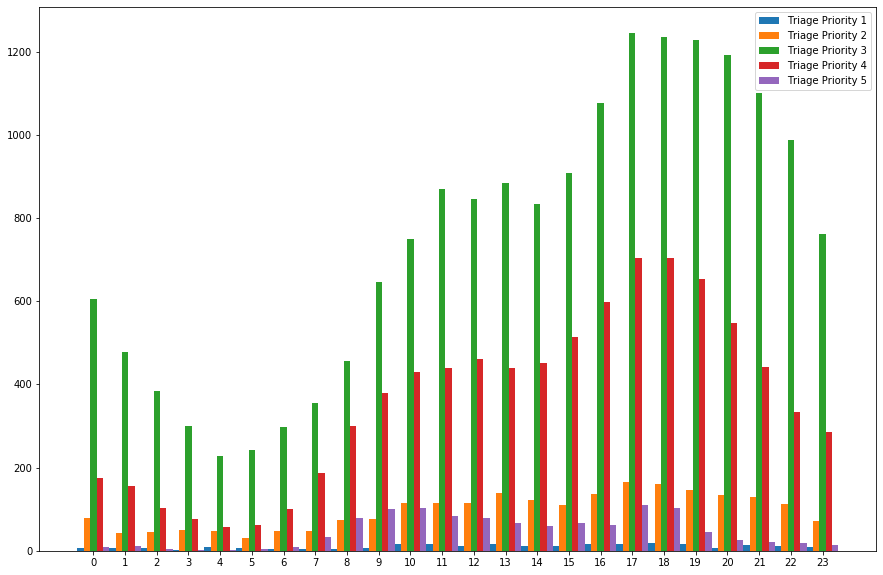

In [29]:
fig, ax = plt.subplots(figsize = (15, 10))

labels = list(Hour_Triage["Arrival Hour"].unique())

ind = np.arange(len(labels))

axesList = createGroupedCharts(labels, ax, Hour_Triage, "Triage Priority")

ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()